In [1]:
import pandas as pd
import numpy as np
import inspect
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
a = pd.read_csv('Flight_id.csv')
df = a.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   flight_id      193 non-null    int64  
 1   flight_no      193 non-null    object 
 2   city_dep       193 non-null    object 
 3   city_arr       193 non-null    object 
 4   month_arrival  193 non-null    object 
 5   aircraft_code  193 non-null    object 
 6   flight_time    193 non-null    float64
 7   flight_cost    193 non-null    float64
 8   ticket_count   193 non-null    int64  
 9   total_seats    193 non-null    int64  
 10  occ_perc       193 non-null    int64  
 11  rev            193 non-null    int64  
 12  profit         193 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 19.7+ KB


 Описание данных:  
 0   flight_id      - номер рейса  
 1   flight_no      - регулярное направление  
 2   city           - город отправления  
 3   city_arr       - город прибытия  
 4   month_arrival  - дата прибытия  
 5   aircraft_code  - код типа самолёта  
 6   flight_time    - время полёта, мин  
 7   flight_cost    - затраты на рейс, тыс. руб. = стоимость топлива * расход топлива марки самолёта + постоянные издержки на рейс (обслуживание самолёта, пошлины аэропорта, стоянка и пр. ~ 50 000 р./рейс) Расход топлива: 2,4т/час для 733 и 1,7 т/час для SU9, стоимость топлива 50тыс.руб/т
 8   ticket_count   - количество билетов купленных на рейс  
 9   total_seats    - максимальное количество мест на борту  
 10   occ_perc       - заполненнность самолёта (отношение купленных билетов к максимальному количеству мест)  
 11   rev           - выручка от продажи билетов, тыс. руб
 12  profit         - прибыльность рейса, тыс. руб = выручка от продажи билетов - затраты на рейс

In [3]:
df.sample(10)

,flight_id,flight_no,city_dep,city_arr,month_arrival,aircraft_code,flight_time,flight_cost,ticket_count,total_seats,occ_perc,rev,profit
73,136345,PG0252,Anapa,Moscow,2017-01-01,733,100.0,250.0,108,130,83,1518,1268.0
171,136888,PG0480,Anapa,Belgorod,2017-02-01,SU9,50.0,121.0,79,97,81,626,505.0
24,136479,PG0252,Anapa,Moscow,2017-02-01,733,100.0,250.0,122,130,93,1738,1488.0
184,136514,PG0194,Anapa,Novokuznetsk,2017-02-01,733,305.0,660.0,0,130,0,0,-660.0
75,136491,PG0252,Anapa,Moscow,2016-12-01,733,100.0,250.0,103,130,79,1505,1255.0
12,136423,PG0252,Anapa,Moscow,2017-01-01,733,100.0,250.0,129,130,99,1849,1599.0
33,136293,PG0252,Anapa,Moscow,2017-01-01,733,100.0,250.0,114,130,87,1690,1440.0
114,136586,PG0480,Anapa,Belgorod,2017-01-01,SU9,50.0,121.0,96,97,98,759,638.0
158,136592,PG0480,Anapa,Belgorod,2016-12-01,SU9,50.0,121.0,89,97,91,677,556.0
121,136873,PG0480,Anapa,Belgorod,2016-12-01,SU9,50.0,121.0,96,97,98,759,638.0


Посмотрим на суммарные значения и средние для всех полётов

In [4]:
df.iloc[:,-7:].sum()

flight_time      17465.0
flight_cost      41970.0
ticket_count     18351.0
total_seats      22120.0
occ_perc         16161.0
rev             212331.0
profit          170361.0
dtype: float64

In [5]:
df.iloc[:,-7:].mean()

flight_time       90.492228
flight_cost      217.461140
ticket_count      95.082902
total_seats      114.611399
occ_perc          83.735751
rev             1100.160622
profit           882.699482
dtype: float64

Преобразуем дату в номер месяца

In [6]:
df.month_arrival

0      2016-12-01
1      2016-12-01
2      2016-12-01
3      2017-01-01
4      2017-01-01
          ...    
188    2017-01-01
189    2017-01-01
190    2017-01-01
191    2017-01-01
192    2016-12-01
Name: month_arrival, Length: 193, dtype: object

In [7]:
for i in df.index:
    df.loc[i, 'month'] = datetime.strptime(df.loc[i, 'month_arrival'], '%Y-%m-%d').month

Сгруппируем рейсы по направлениям, посмотрим на средние и суммарные значения признаков и их количество

In [8]:
df.groupby('city_arr').mean().sort_values(by = 'profit', ascending = False)

,flight_id,flight_time,flight_cost,ticket_count,total_seats,occ_perc,rev,profit,month
city_arr,,,,,,,,,
Moscow,136307.800000,100.0,250.0,113.444444,130.0,86.866667,1646.944444,1396.944444,5.100000
Belgorod,136773.788889,50.0,121.0,90.455556,97.0,92.700000,712.288889,591.288889,5.100000
Novokuznetsk,136535.923077,305.0,660.0,0.000000,130.0,0.000000,0.000000,-660.000000,4.692308


In [9]:
df.groupby('city_arr').sum().sort_values(by = 'profit', ascending = False)

,flight_id,flight_time,flight_cost,ticket_count,total_seats,occ_perc,rev,profit,month
city_arr,,,,,,,,,
Moscow,12267702,9000.0,22500.0,10210,11700,7818,148225,125725.0,459.0
Belgorod,12309641,4500.0,10890.0,8141,8730,8343,64106,53216.0,459.0
Novokuznetsk,1774967,3965.0,8580.0,0,1690,0,0,-8580.0,61.0


In [10]:
df.groupby('city_arr').flight_id.count()

city_arr
Belgorod        90
Moscow          90
Novokuznetsk    13
Name: flight_id, dtype: int64

Уже видим, проблемы с Новокузнецким направлением. Посмотрим сразу на все убыточные направления.

In [11]:
df[df.profit < 0]

,flight_id,flight_no,city_dep,city_arr,month_arrival,aircraft_code,flight_time,flight_cost,ticket_count,total_seats,occ_perc,rev,profit,month
180,136511,PG0194,Anapa,Novokuznetsk,2017-02-01,733,305.0,660.0,0,130,0,0,-660.0,2.0
181,136567,PG0194,Anapa,Novokuznetsk,2017-02-01,733,305.0,660.0,0,130,0,0,-660.0,2.0
182,136533,PG0194,Anapa,Novokuznetsk,2016-12-01,733,305.0,660.0,0,130,0,0,-660.0,12.0
183,136534,PG0194,Anapa,Novokuznetsk,2016-12-01,733,305.0,660.0,0,130,0,0,-660.0,12.0
184,136514,PG0194,Anapa,Novokuznetsk,2017-02-01,733,305.0,660.0,0,130,0,0,-660.0,2.0
185,136540,PG0194,Anapa,Novokuznetsk,2017-01-01,733,305.0,660.0,0,130,0,0,-660.0,1.0
186,136564,PG0194,Anapa,Novokuznetsk,2016-12-01,733,305.0,660.0,0,130,0,0,-660.0,12.0
187,136513,PG0194,Anapa,Novokuznetsk,2017-02-01,733,305.0,660.0,0,130,0,0,-660.0,2.0
188,136544,PG0194,Anapa,Novokuznetsk,2017-01-01,733,305.0,660.0,0,130,0,0,-660.0,1.0
189,136560,PG0194,Anapa,Novokuznetsk,2017-01-01,733,305.0,660.0,0,130,0,0,-660.0,1.0


Посмотрим в какие месяцы состоялись данные рейсы

In [12]:
df[df.profit < 0].month.value_counts()

1.0     5
2.0     4
12.0    4
Name: month, dtype: int64

Все 13 полётов в Новокузнецк прошли без проданных билетов. Остальные рейсы являются прибыльными.
Это может быть либо ошибка в базе, либо действительно полёты в Новокузнецк проходили без пассажиров.
Отметим, что для уменьшения затрат можно предпринять следующие меры: 
1. Сократить число рейсов в Новокузнецк в каждом зимнем месяце.
2. Сменить самолёт с 733 на более экономичный, например SU9

Далее мы будем анализировать только рейсы "Белгород" и "Москва" для более наглядного сравнения и поиска вариантов оптимизации рейсов.

In [13]:
dfBM = df[df['city_arr'] != 'Novokuznetsk'].copy()

In [14]:
dfBM.city_arr.value_counts()

Belgorod    90
Moscow      90
Name: city_arr, dtype: int64

<AxesSubplot:>

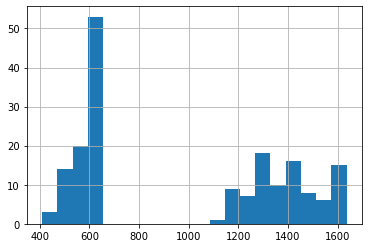

In [15]:
dfBM.profit.hist(bins = 20)

Из работы с базой мы знаем, что в Москву и Белгород летают разные самолёты и разным количеством посадочных мест. Проверим две группы на гистограмме это разделение по направлению или на прибыль рейса существенно будет влиять другой фактов.

In [16]:
dfBM[dfBM.profit < 800].city_arr.value_counts()

Belgorod    90
Name: city_arr, dtype: int64

In [17]:
dfBM[dfBM.profit > 800].city_arr.value_counts()

Moscow    90
Name: city_arr, dtype: int64

Действительно, где больше перевезённых пассажиров - там больше прибыль. Проверим насколько заполненными летают рейсы

<AxesSubplot:>

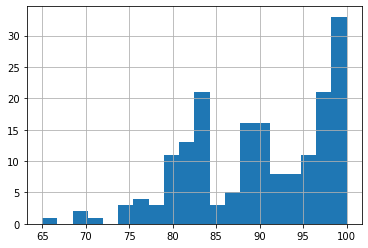

In [18]:
dfBM.occ_perc.hist(bins = 20)

<AxesSubplot:>

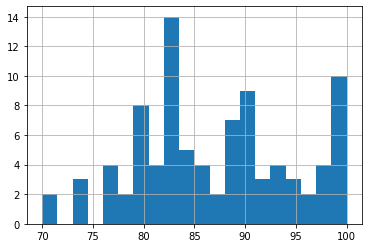

In [19]:
dfBM[dfBM.city_arr == 'Moscow'].occ_perc.hist(bins = 20)

<AxesSubplot:>

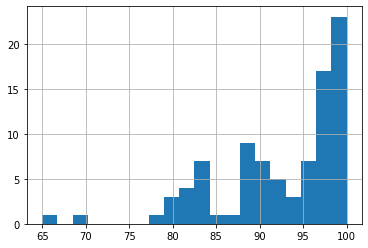

In [20]:
dfBM[dfBM.city_arr == 'Belgorod'].occ_perc.hist(bins = 20)

В Белгород самолёты чаще летают заполненными под 100%, но картина не отличается не кардинально.

In [21]:
dfBM.occ_perc.value_counts().sort_index()

65      1
70      2
71      1
74      3
76      4
78      3
79      2
80      9
81      7
82      6
83     11
84     10
85      3
86      3
87      2
88      5
89     11
90     12
91      4
92      8
93      5
94      3
95      3
96      8
97      4
98     17
99      5
100    28
Name: occ_perc, dtype: int64

Только один рейс имеет загрузку менее 70%, подавляющее большинство имееют загрузку 80% и более для обоих направлений. Это хорошие показатели.

Проверим разницу в показателях между месяцами. Может быть до нового года или после активность пассажиров как-то меняется.

In [22]:
dfBM.month.value_counts()

1.0     62
12.0    62
2.0     56
Name: month, dtype: int64

В феврале было немного меньше рейсов. Посмотрим отразилось ли это на общую прибыль, среднюю прибыль за рейс и загрузку пассажиров.

In [23]:
dfBM.groupby('month').mean()

,flight_id,flight_time,flight_cost,ticket_count,total_seats,occ_perc,rev,profit
month,,,,,,,,
1.0,136527.403226,75.0,185.5,102.096774,113.5,89.854839,1182.903226,997.403226
2.0,136540.125000,75.0,185.5,101.160714,113.5,89.142857,1169.321429,983.821429
12.0,136554.790323,75.0,185.5,102.516129,113.5,90.290323,1185.629032,1000.129032


Средняя прибыль и средняя загрузка на сравнительно одинаковом уровне.

In [24]:
dfBM.groupby('month').sum()

,flight_id,flight_time,flight_cost,ticket_count,total_seats,occ_perc,rev,profit
month,,,,,,,,
1.0,8464699,4650.0,11501.0,6330,7037,5571,73340,61839.0
2.0,7646247,4200.0,10388.0,5665,6356,4992,65482,55094.0
12.0,8466397,4650.0,11501.0,6356,7037,5598,73509,62008.0


Общая прибыль меньше в феврале, но это обуславливается меньшим количеством перевезённых пассажиров и меньшим количеством рейсов, которое мы подметили ранее.

Посмотрим в какие месяцы летают рейсы по направлениям Москва и Белгород.

In [25]:
dummi = pd.get_dummies(dfBM['month'], columns=['month']).copy() 
dfBM= pd.concat([dfBM, dummi], axis=1)

In [26]:
dfBM.groupby('city_arr').sum().iloc[:,-3:]

,1.0,2.0,12.0
city_arr,,,
Belgorod,31,28,31
Moscow,31,28,31


Рейсы летают с одинаковой регулярностью внутри месяцев.

Посмотрим визуально на разницу влияния месяцев на прибыль и загрузку.

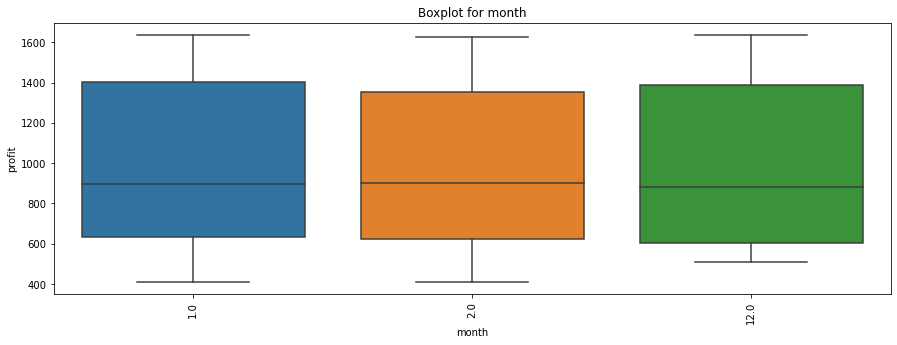

In [27]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.boxplot(x='month', y='profit',data=dfBM.loc[dfBM.loc[:, 'month'].isin(df.loc[:, 'month'].value_counts().index[:])],ax=ax)

plt.xticks(rotation=90)
ax.set_title('Boxplot for month')

plt.show()

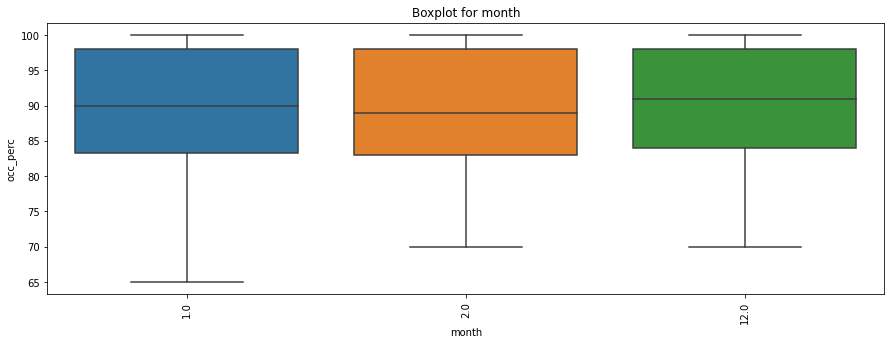

In [28]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.boxplot(x='month', y='occ_perc',data=dfBM.loc[df.loc[:, 'month'].isin(dfBM.loc[:, 'month'].value_counts().index[:])],ax=ax)

plt.xticks(rotation=90)
ax.set_title('Boxplot for month')

plt.show()

# Основные выводы:
### Новокузнецкое направление является убыточным:  
оно является непопулярным: за 13 рейсов не продано ни одного билета  
рейсы данного направления самые дорогие, т.к. обладают самой большой длительностью перелётов и без необходимости используют самолёты с большим расходом топлива
### Направления «Москва» и «Белгород» являются прибыльными: 
направления в большинстве обладают хорошей загрузкой пассажирами 80% и более во все зимние времена месяца, что обуславливается оптимальным типом самолёта и оптимальным количеством рейсов по этому направлению в разные зимние месяцы

### Рекомендации для уменьшения издержек по убыточным направлениям:
сократить количество рейсов, для увеличения загрузки пассажирами  
выбрать для авиаперевозок оптимальный тип самолёта, который будет соответствовать длительным экономичным перевозкам небольшого количества пассажиров  
уточнить актуальность направления, ориентируясь на спрос населения и результаты других авиакомпаний по данному направлению